## Learning ML Flow For Experiment Tracking

In [8]:
!pip install mlflow
!pip install pyngrok

In [9]:
from pyngrok import ngrok
!ngrok authtoken 2oJDlb5veSoBAqFU8pZT1nq4txa_3QG16FArPmQJavMSexFF5

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [10]:
from pyngrok import ngrok
import mlflow

# Ngrok ke through MLflow server ka public URL generate karna
ngrok_tunnel = ngrok.connect(5000)
mlflow_tracking_uri = ngrok_tunnel.public_url
print("MLflow Tracking URI:", mlflow_tracking_uri)

# MLflow server ko background mein start karna
get_ipython().system_raw("mlflow ui --port 5000 --host 0.0.0.0 &")

# Tracking URI ko MLflow ke liye set karna
mlflow.set_tracking_uri(mlflow_tracking_uri)


MLflow Tracking URI: https://c153-35-190-132-49.ngrok-free.app


In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Data Load Karna
data = load_iris()
X = data.data
y = data.target

# Data Split Karna
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLflow Tracking Start Karna
mlflow.start_run()

# Model Train Karna
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions Karna
predictions = model.predict(X_test)

# Accuracy Calculate Karna
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

# Parameters aur Metrics Log Karna
mlflow.log_param("n_estimators", 100)
mlflow.log_param("test_size", 0.2)
mlflow.log_metric("accuracy", accuracy)

# Model Save Karna
mlflow.sklearn.log_model(model, "random_forest_model")

# Run End Karna
mlflow.end_run()


Model Accuracy: 1.0


2024/11/03 09:11:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/03 09:11:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run stately-bear-141 at: https://dea1-35-190-132-49.ngrok-free.app/#/experiments/0/runs/d4cbe56419dd4c5bad16fa4d24a6bb40.
2024/11/03 09:11:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dea1-35-190-132-49.ngrok-free.app/#/experiments/0.


In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data Load Karna
data = load_iris()
X = data.data
y = data.target

# Data Split Karna
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLflow Tracking Start Karna
with mlflow.start_run(run_name="RandomForestClassifier"):

    # Model Train Karna
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predictions Karna
    predictions = model.predict(X_test)

    # Accuracy Calculate Karna
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average="macro")
    recall = recall_score(y_test, predictions, average="macro")
    f1 = f1_score(y_test, predictions, average="macro")

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Parameters aur Metrics Log Karna
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("test_size", 0.2)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    # Model Save Karna
    mlflow.sklearn.log_model(model, "random_forest_model")

# Run End Karna (automatic with 'with' statement)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


2024/11/03 09:30:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/03 09:30:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForestClassifier at: https://dea1-35-190-132-49.ngrok-free.app/#/experiments/0/runs/2e76366f90c54eb7b80469f503262069.
2024/11/03 09:30:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dea1-35-190-132-49.ngrok-free.app/#/experiments/0.


2024/11/03 11:25:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/03 11:25:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_Example at: https://c153-35-190-132-49.ngrok-free.app/#/experiments/0/runs/08f5abce19764a249da620f32cf2b582.
2024/11/03 11:25:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://c153-35-190-132-49.ngrok-free.app/#/experiments/0.


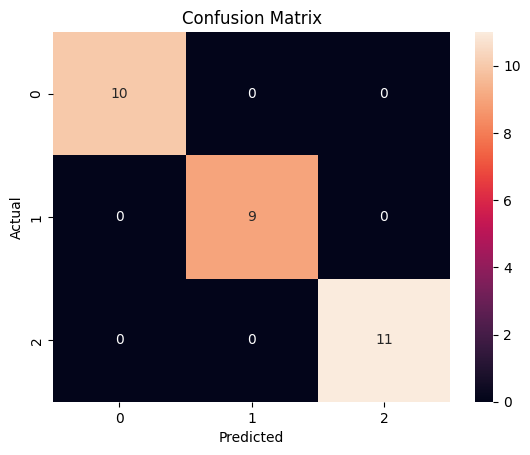

In [16]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Data load aur split karna
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLflow tracking start karna
with mlflow.start_run(run_name="RandomForest_Example"):

    # Model train karna
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predictions aur accuracy calculate karna
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    # Parameters aur metrics log karna
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("test_size", 0.2)
    mlflow.log_metric("accuracy", accuracy)

    # Confusion Matrix plot aur usko artifact ke tor par save karna
    cm = pd.crosstab(y_test, predictions, rownames=["Actual"], colnames=["Predicted"])
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Model ko artifact ke tor par save karna
    mlflow.sklearn.log_model(model, "random_forest_model")

# Confusion matrix image delete karna (optional)
os.remove("confusion_matrix.png")


2024/11/03 11:25:13 INFO mlflow.tracking.fluent: Experiment with name 'Iris_Classification_Project' does not exist. Creating a new experiment.
2024/11/03 11:25:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/03 11:25:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_Example at: https://c153-35-190-132-49.ngrok-free.app/#/experiments/269199248893816209/runs/0fbe97e9f56c47f3a80dec71439ecee6.
2024/11/03 11:25:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://c153-35-190-132-49.ngrok-free.app/#/experiments/269199248893816209.


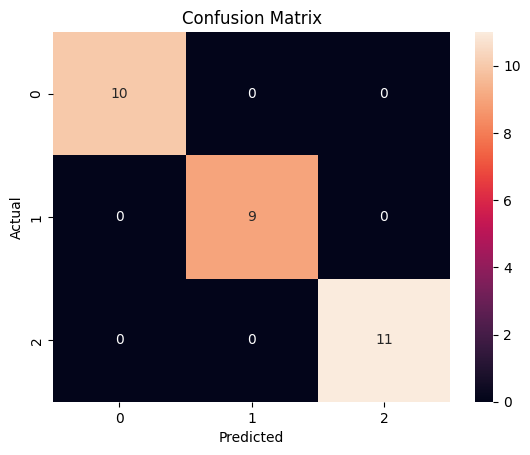

In [17]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Experiment name set karna
mlflow.set_experiment("Iris_Classification_Project")

# Data load aur split karna
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLflow tracking start karna (specific run name ke saath)
with mlflow.start_run(run_name="RandomForest_Example"):

    # Model train karna
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predictions aur accuracy calculate karna
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    # Parameters aur metrics log karna
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("test_size", 0.2)
    mlflow.log_metric("accuracy", accuracy)

    # Confusion Matrix plot aur usko artifact ke tor par save karna
    cm = pd.crosstab(y_test, predictions, rownames=["Actual"], colnames=["Predicted"])
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Model ko artifact ke tor par save karna
    mlflow.sklearn.log_model(model, "random_forest_model")

# Confusion matrix image delete karna (optional)
os.remove("confusion_matrix.png")


In [18]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Experiment name set karna
mlflow.set_experiment("Iris_Multi_Model_Comparison")

# Data load aur split karna
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models ko ek dictionary mein rakhna
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5),
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}

# Har model ke liye run start karna
for model_name, model in models.items():
    with mlflow.start_run(run_name=f"{model_name}_Experiment"):
        # Model train karna
        model.fit(X_train, y_train)

        # Predictions aur metrics calculate karna
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='weighted')
        recall = recall_score(y_test, predictions, average='weighted')
        f1 = f1_score(y_test, predictions, average='weighted')

        # Parameters aur metrics log karna
        mlflow.log_param("model_name", model_name)
        if model_name == "RandomForest":
            mlflow.log_param("n_estimators", 100)
        elif model_name == "KNeighbors":
            mlflow.log_param("n_neighbors", 5)
        # Additional parameters specific to DecisionTree or others can be added similarly

        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        # Confusion Matrix plot aur usko artifact ke tor par save karna
        cm = pd.crosstab(y_test, predictions, rownames=["Actual"], colnames=["Predicted"])
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix for {model_name}")
        plt.savefig(f"{model_name}_confusion_matrix.png")
        mlflow.log_artifact(f"{model_name}_confusion_matrix.png")

        # Model ko artifact ke tor par save karna
        mlflow.sklearn.log_model(model, f"{model_name}_model")

        # Clean up plot files
        plt.clf()  # Clear the current plot for the next iteration
        os.remove(f"{model_name}_confusion_matrix.png")


2024/11/03 11:38:10 INFO mlflow.tracking.fluent: Experiment with name 'Iris_Multi_Model_Comparison' does not exist. Creating a new experiment.
2024/11/03 11:38:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/03 11:38:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_Experiment at: https://c153-35-190-132-49.ngrok-free.app/#/experiments/740877412127057440/runs/f050bd73c64d4ef6a26f2ca82d53c055.
2024/11/03 11:38:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://c153-35-190-132-49.ngrok-free.app/#/experiments/740877412127057440.
2024/11/03 11:38:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/03 11:38:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run KN

<Figure size 640x480 with 0 Axes>